In [98]:
# Import libraries

# Loading dataset
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data splitting
from sklearn.model_selection import train_test_split

# Data modeling
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model performance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

# Model deployment
import streamlit as st
import pickle
import requests


In [99]:
# reading data into dataframe
df = pd.read_csv('breast_cancer_data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Exploring the data

In [5]:
nRow, nCol= df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 569 rows and 33 columns


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Understanding the data

In [7]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [11]:
# Finding the total number of missing values in the dataframe
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
# Drop the "Unnamed: 32" column containing all null values  and id column
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [13]:
# categorical and numerical features
col = list(df.columns)
col.remove('diagnosis')
categorical_features = ['diagnosis']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : diagnosis
Numerical Features : radius_mean texture_mean perimeter_mean area_mean smoothness_mean compactness_mean concavity_mean concave points_mean symmetry_mean fractal_dimension_mean radius_se texture_se perimeter_se area_se smoothness_se compactness_se concavity_se concave points_se symmetry_se fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst smoothness_worst compactness_worst concavity_worst concave points_worst symmetry_worst fractal_dimension_worst


In [14]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [15]:
# 1 : M and 0 : B
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df['diagnosis'] 

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Exploratory Data Analysis (EDA)

<Axes: >

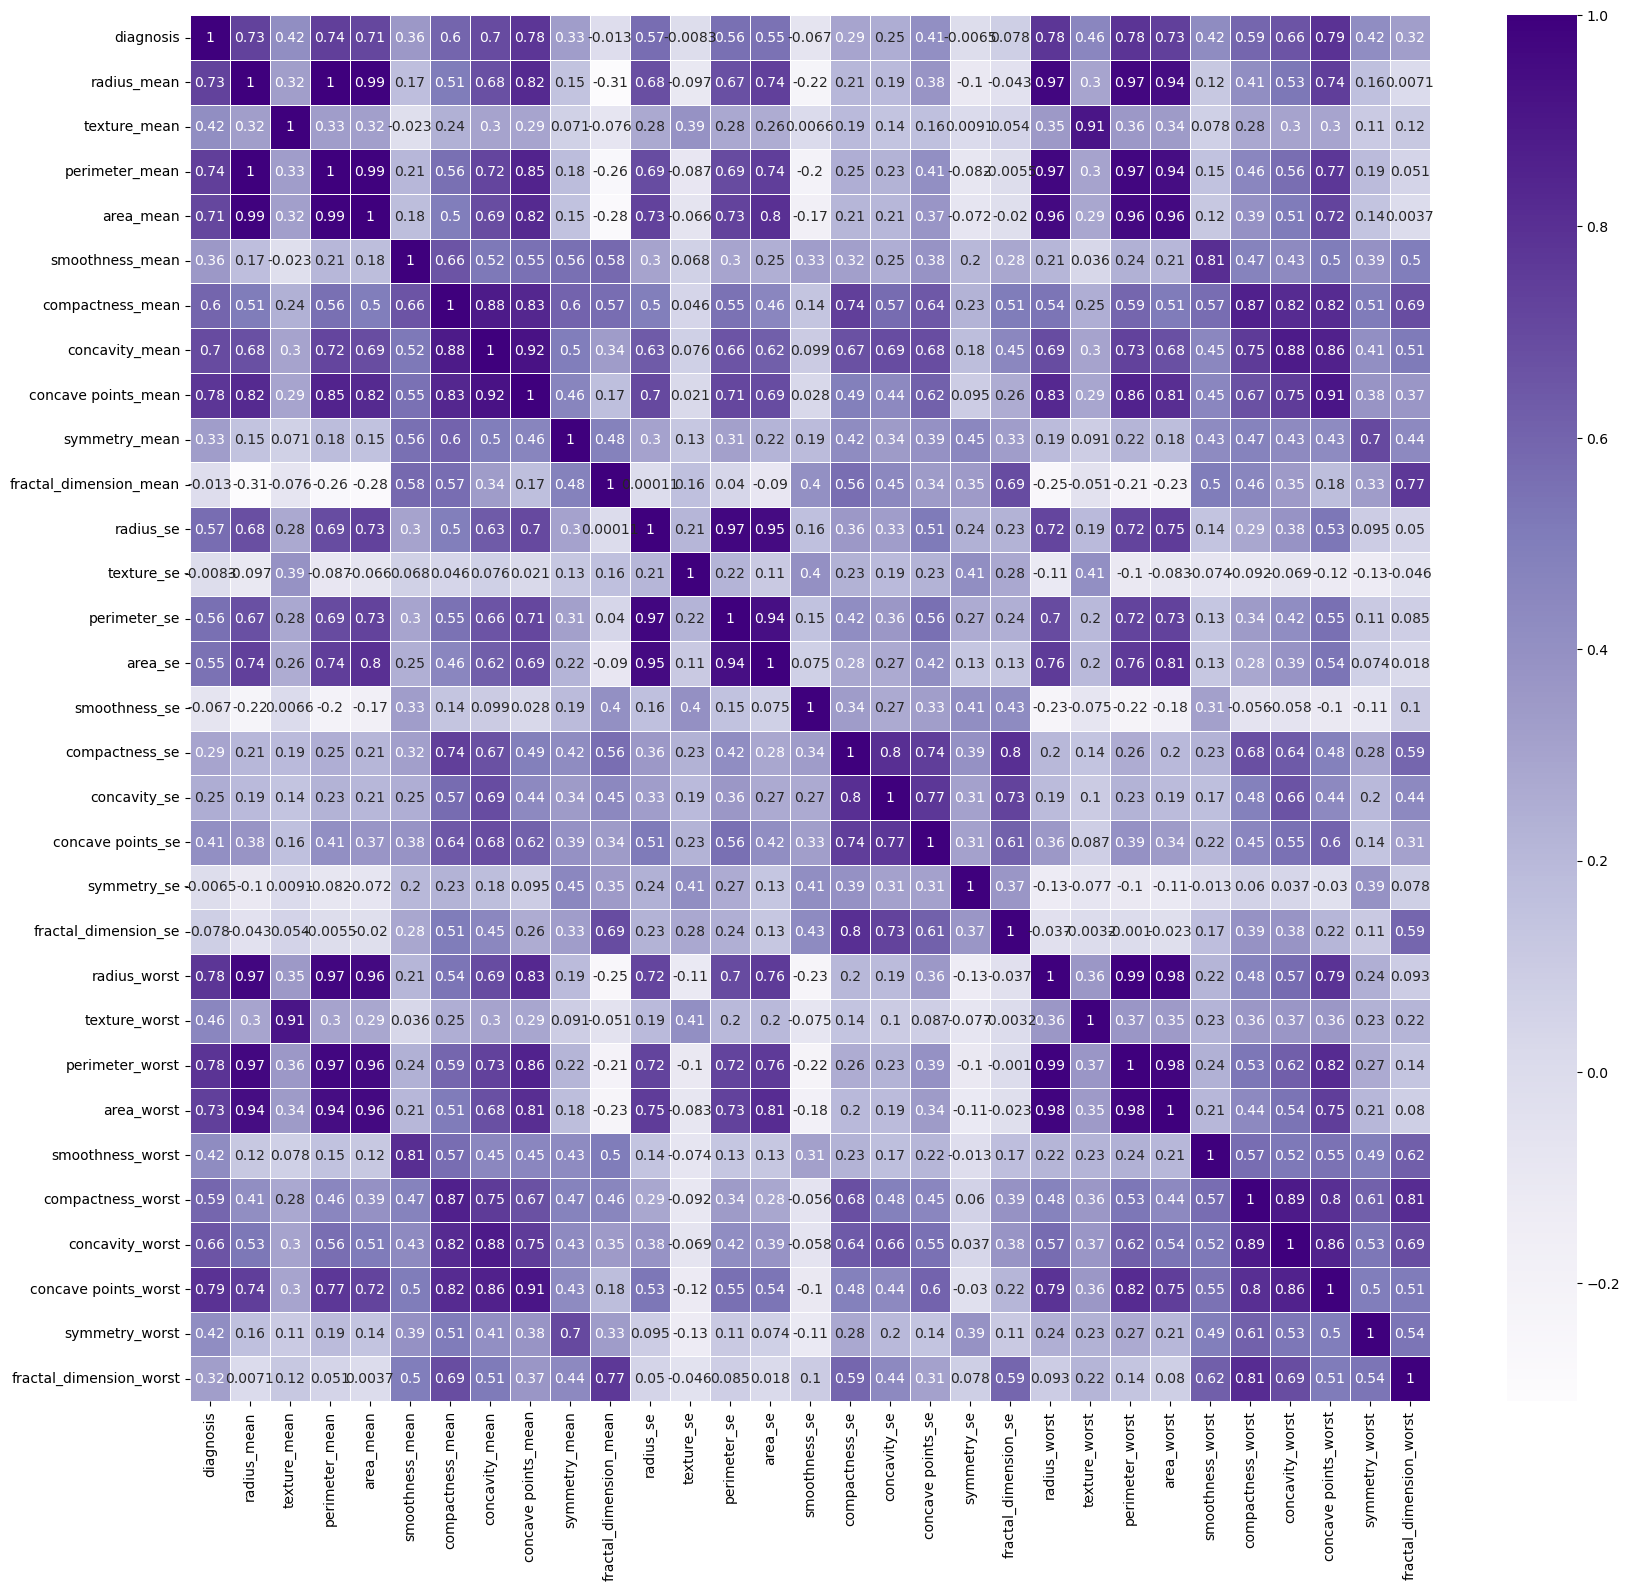

In [16]:
# heatmap
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="Purples")

In [17]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

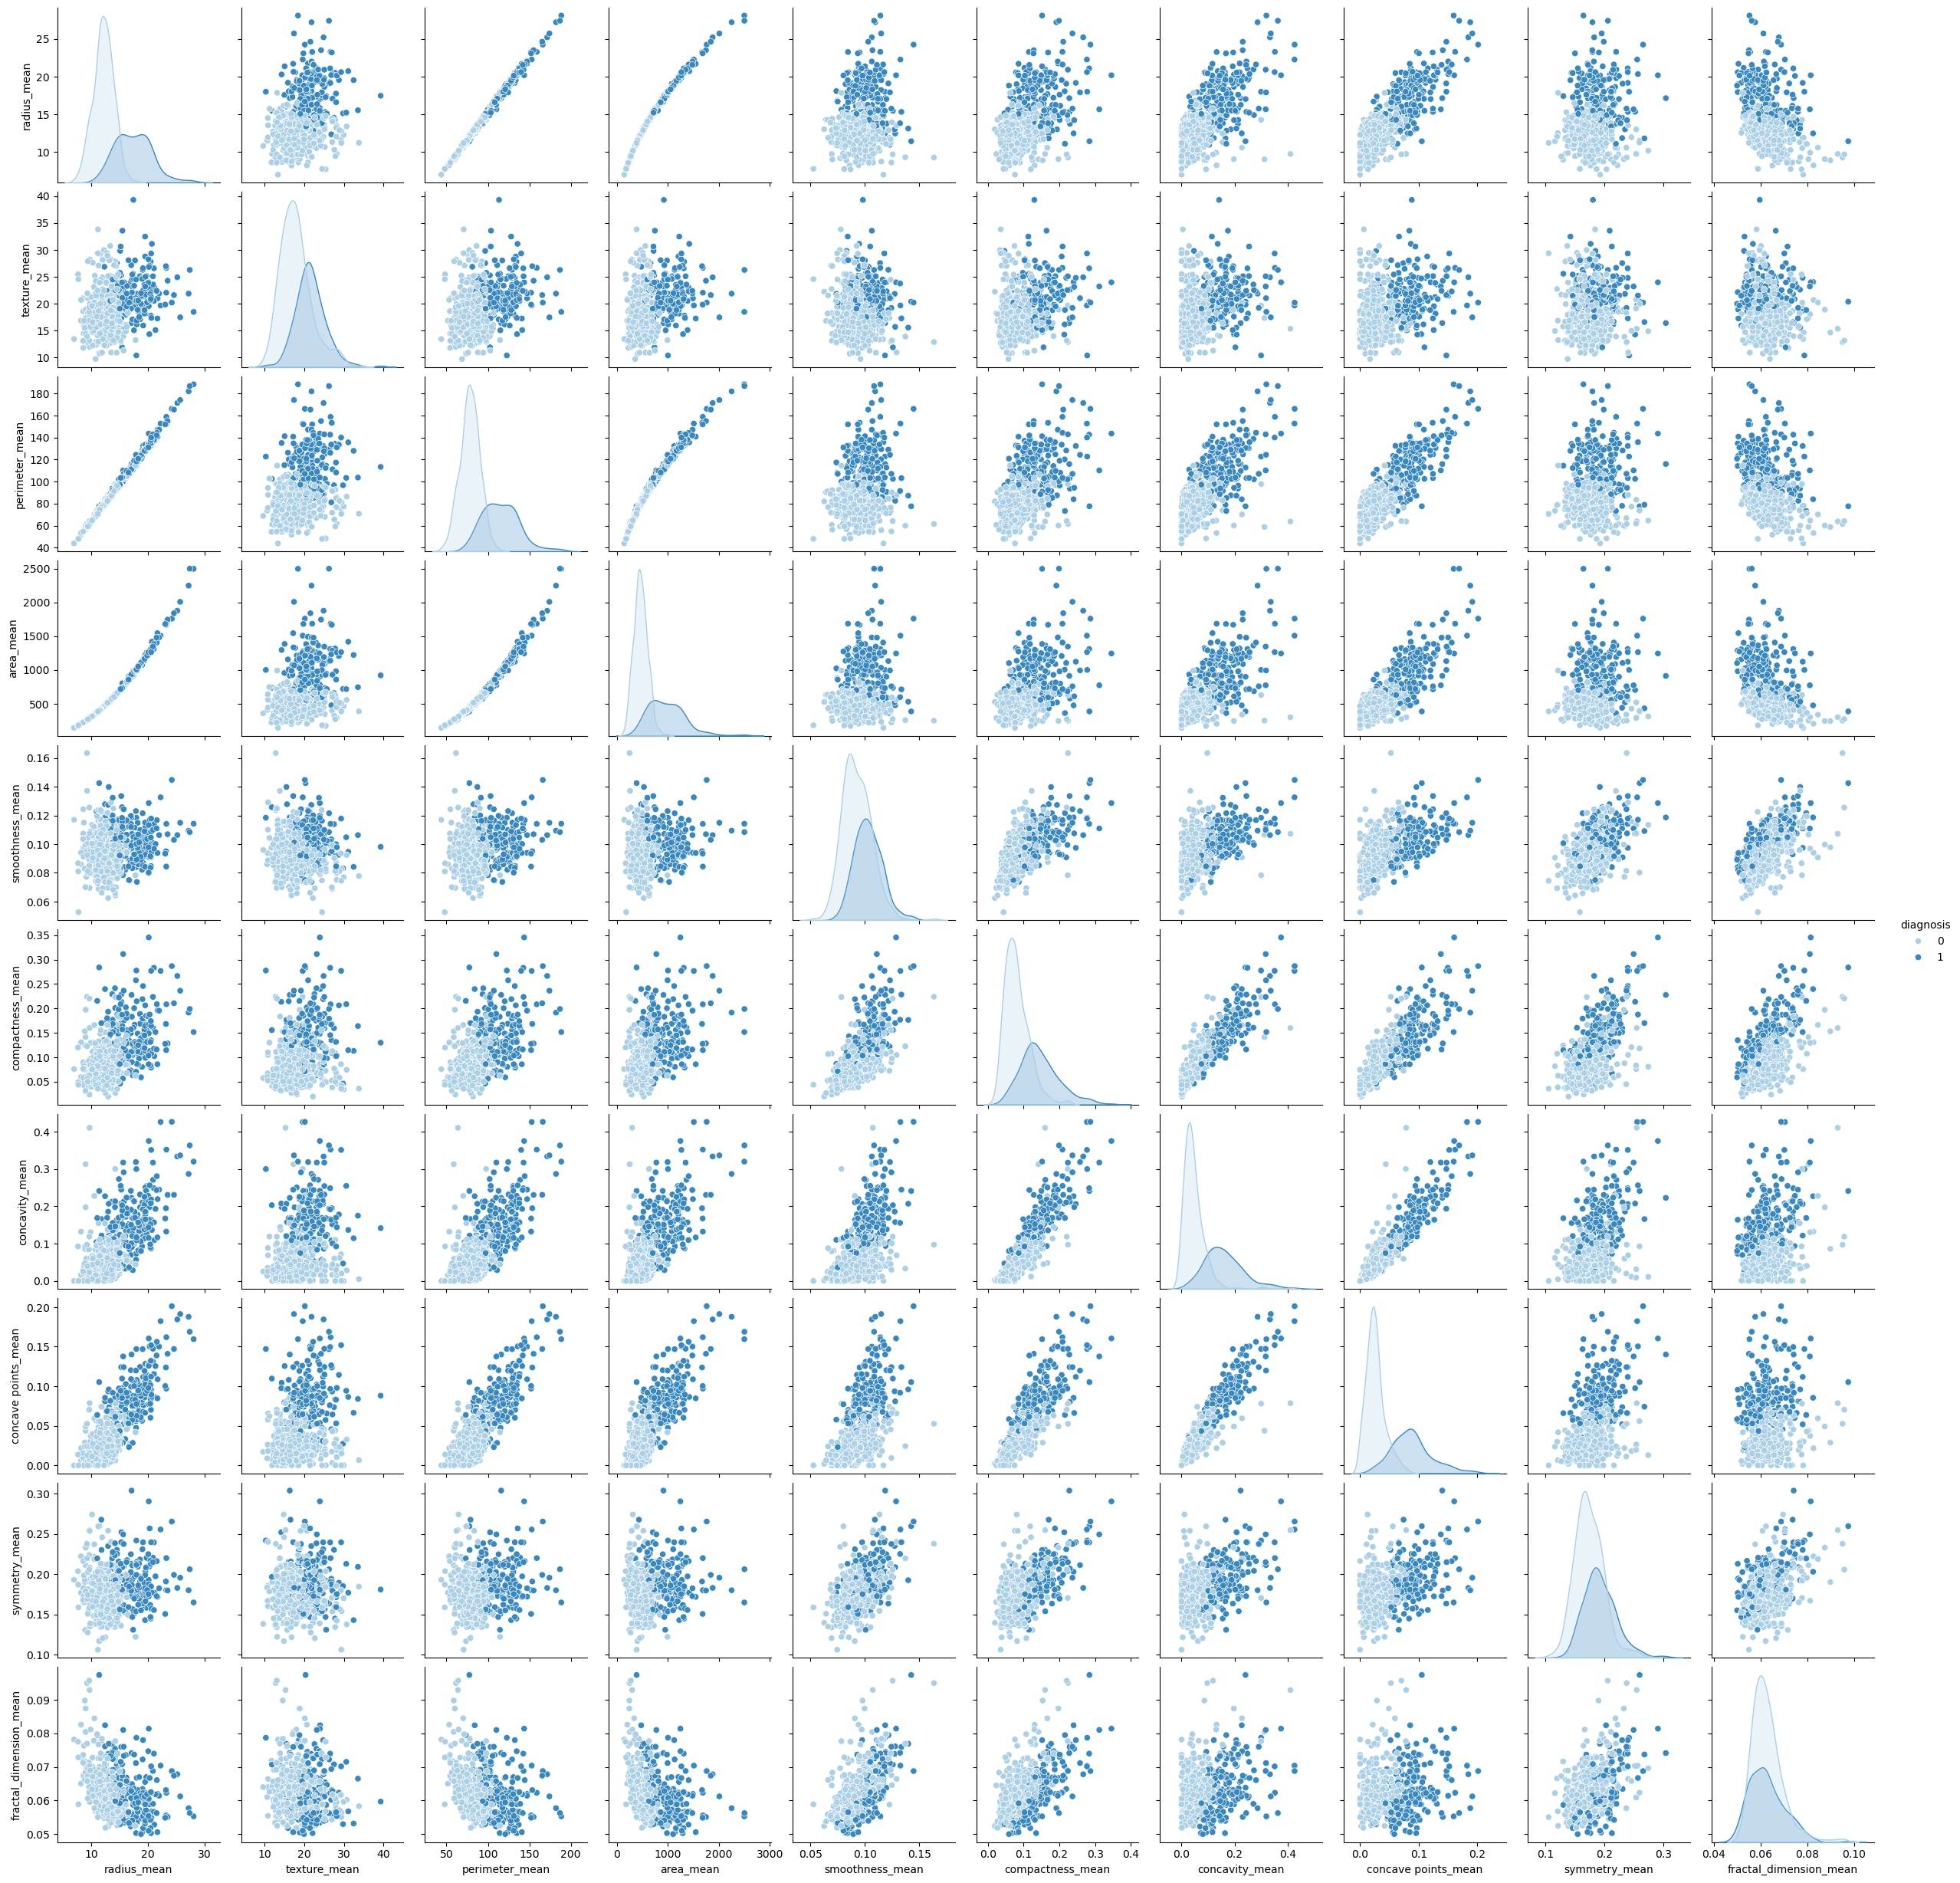

In [18]:
# pairplot for mean columns
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues')

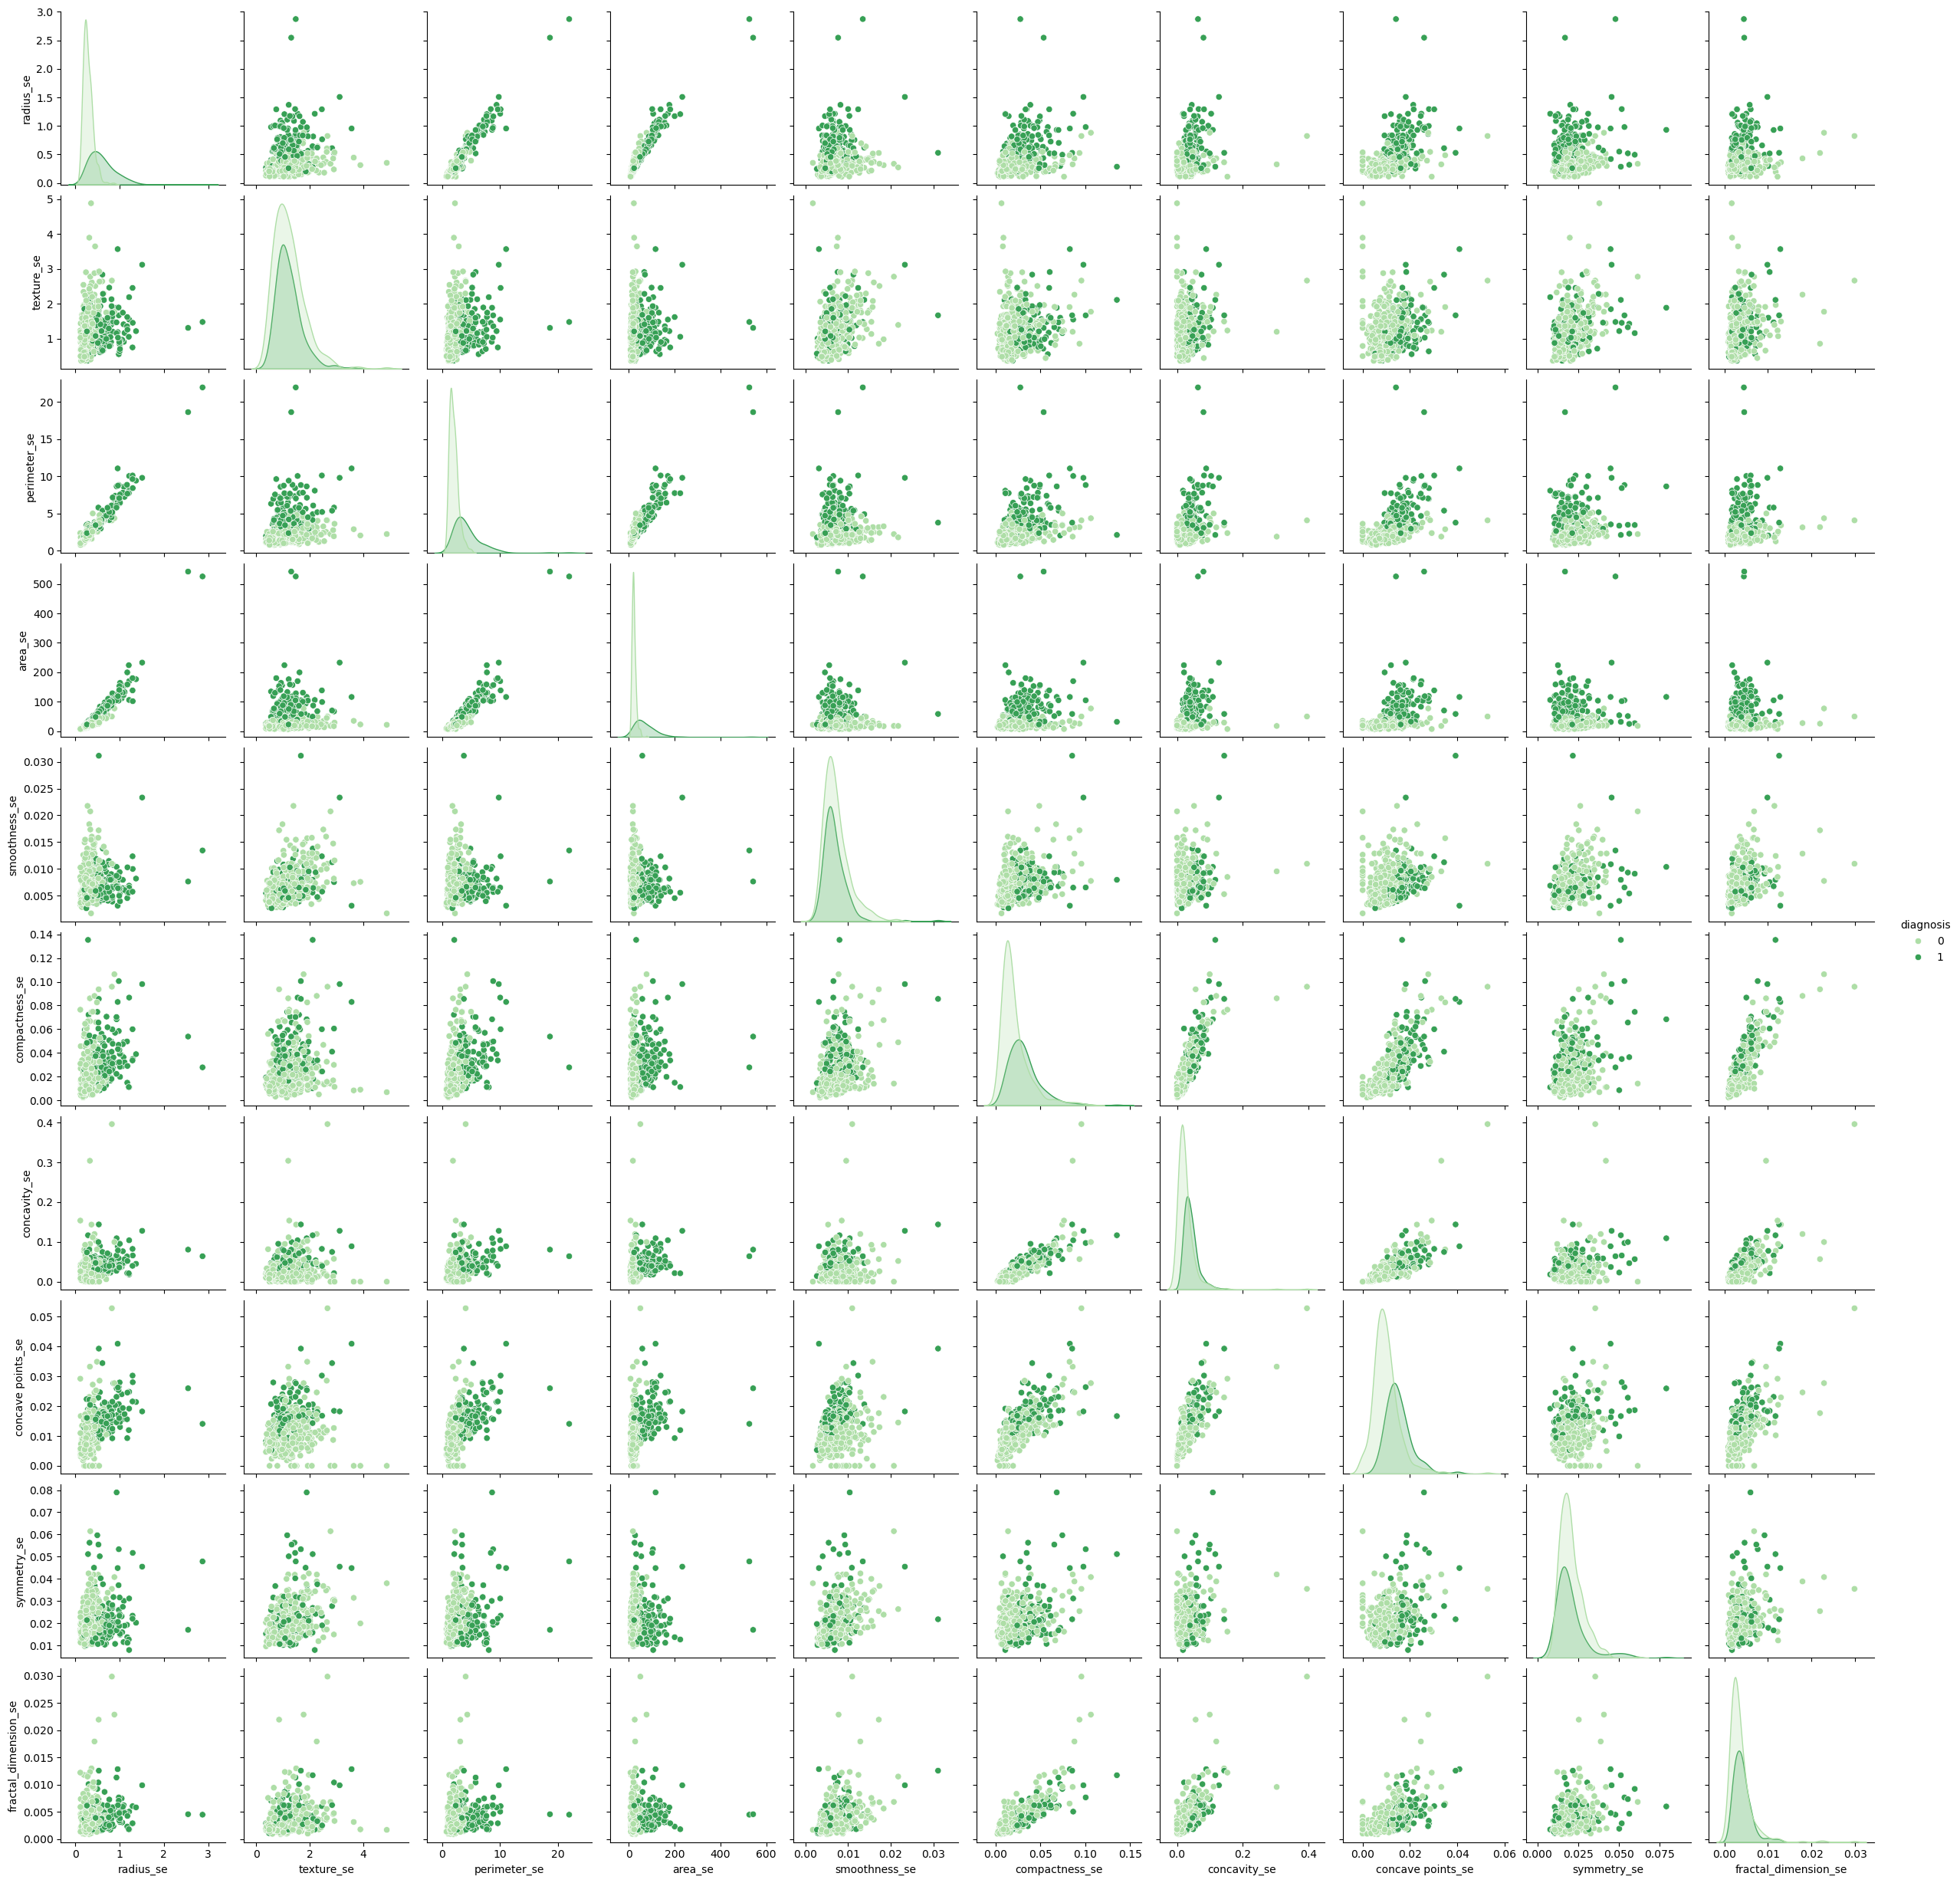

In [19]:
# pairplot for se columns
sns.pairplot(df[s_col],hue = 'diagnosis', palette='Greens')

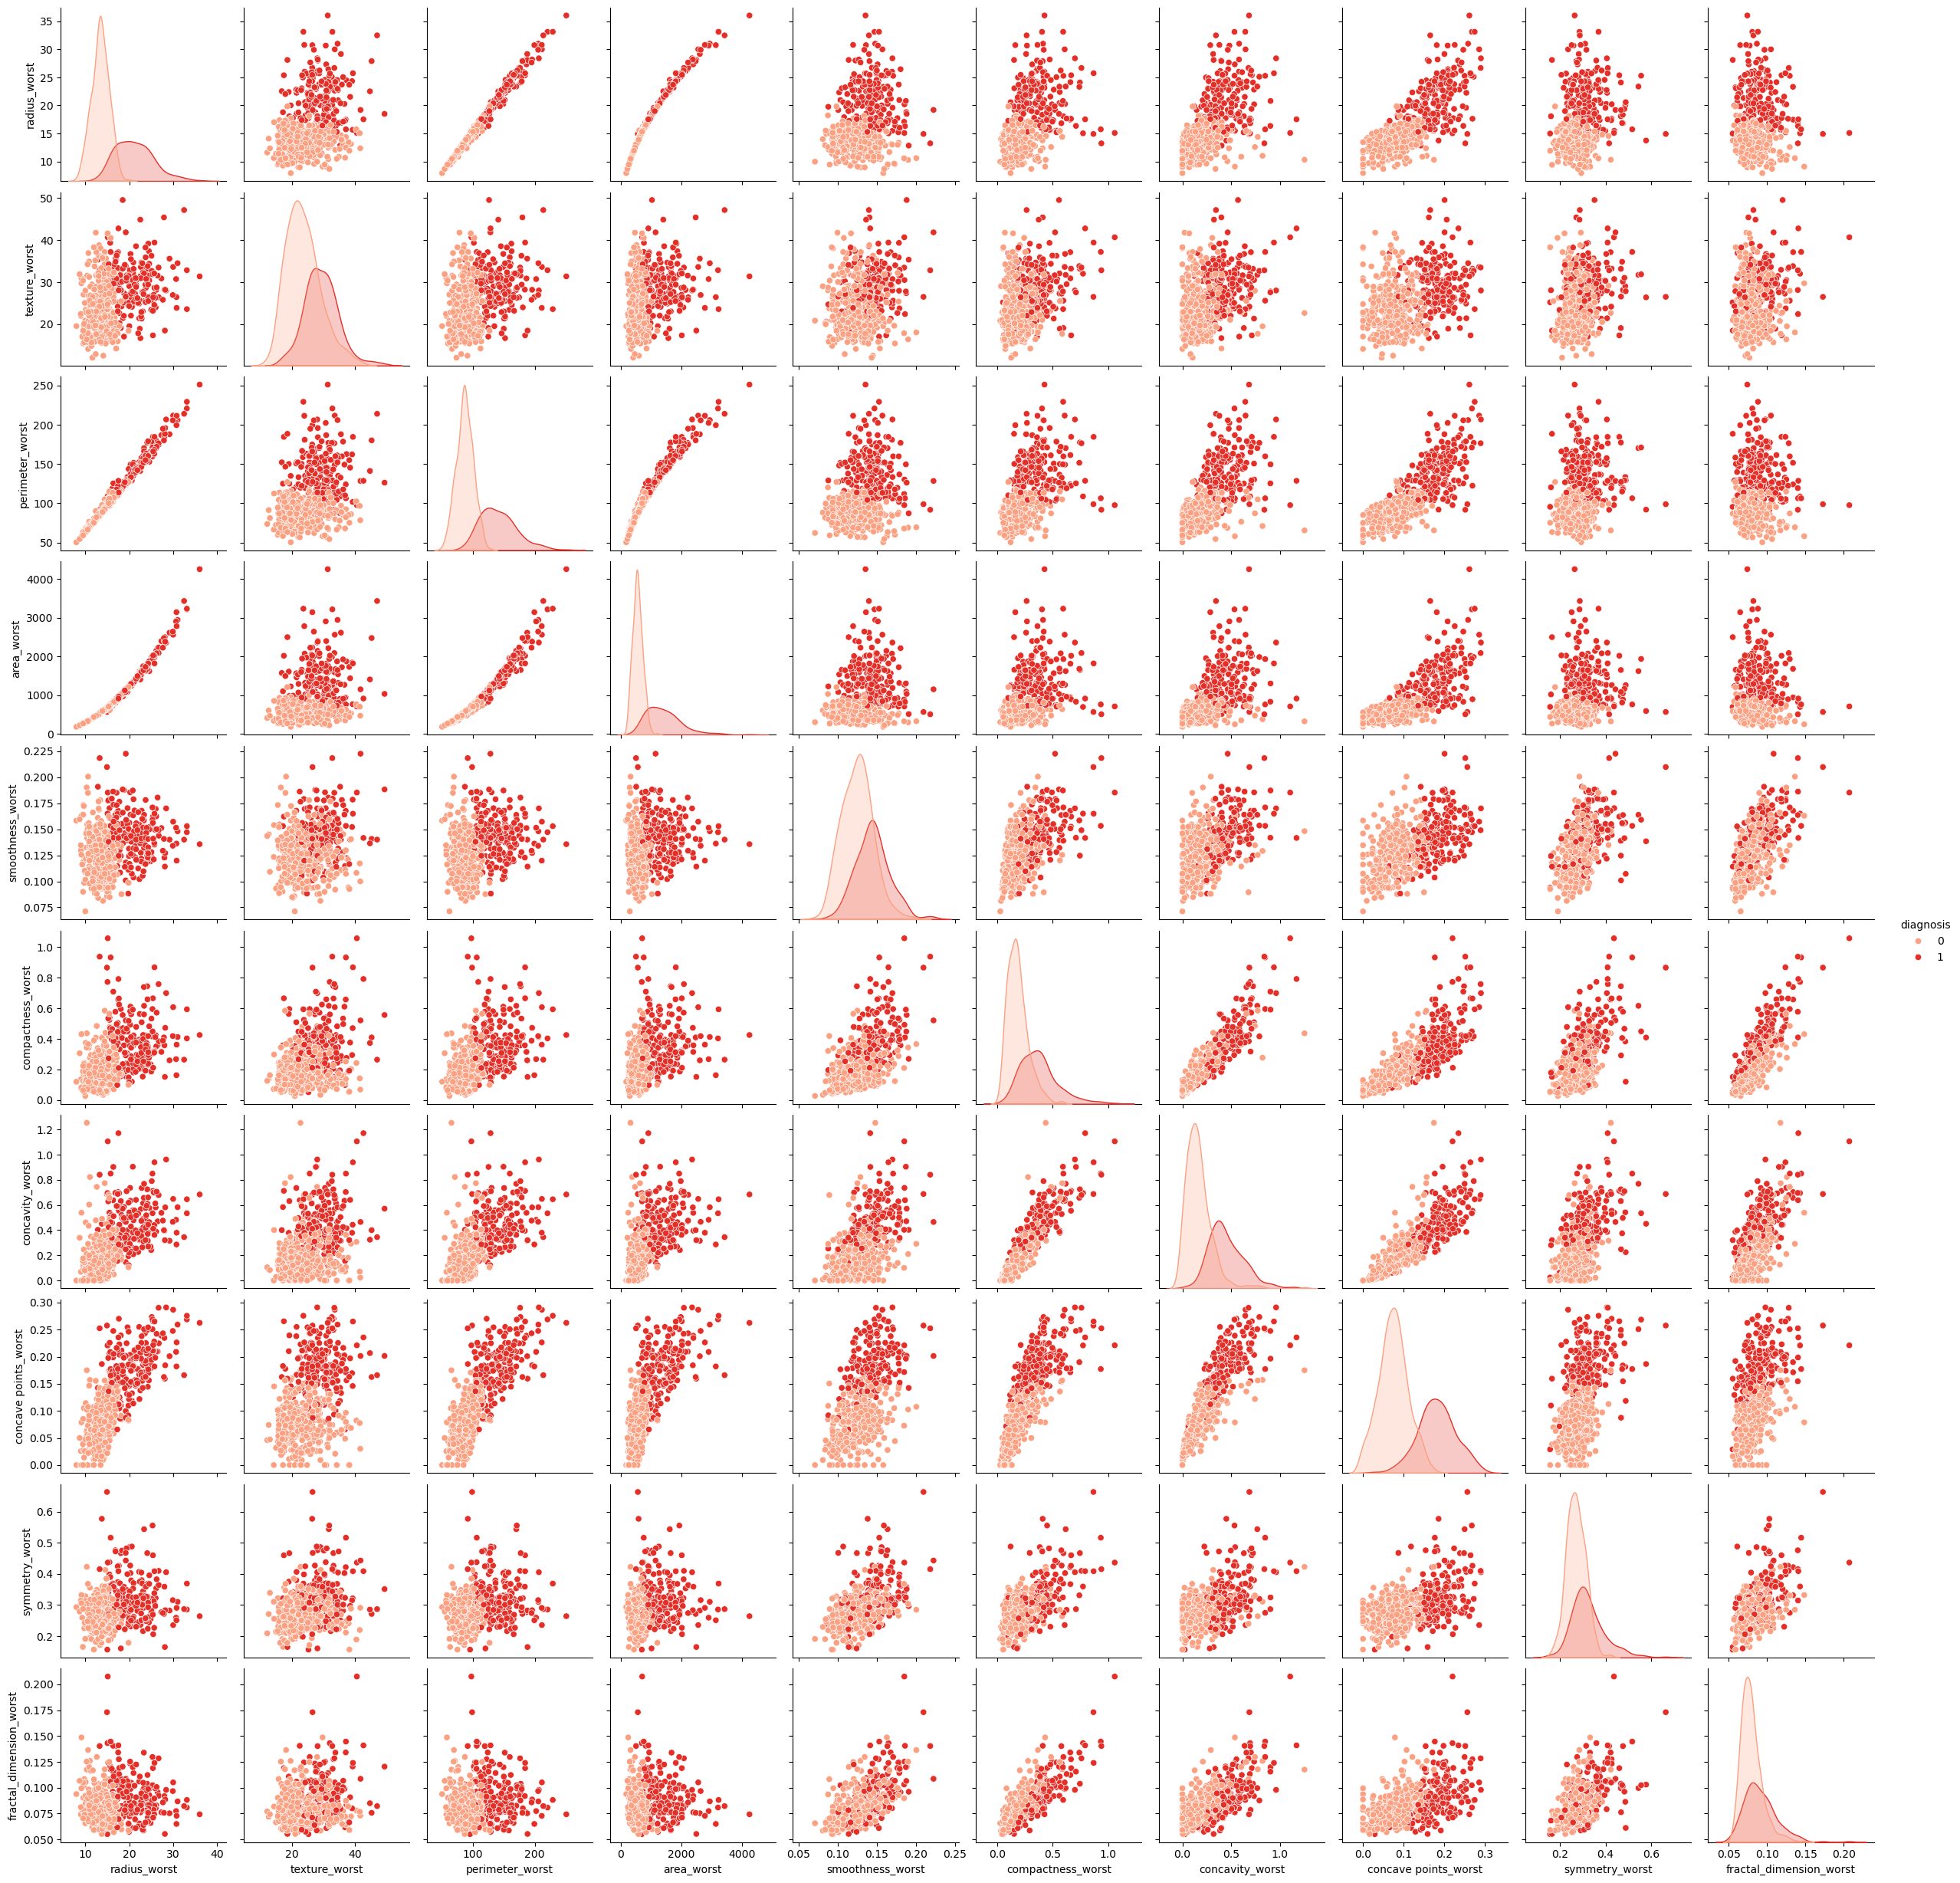

In [20]:
# pairplot for worst columns
sns.pairplot(df[w_col],hue = 'diagnosis', palette='Reds')

Data Preprocessing and Building Models

In [21]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [22]:
df.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

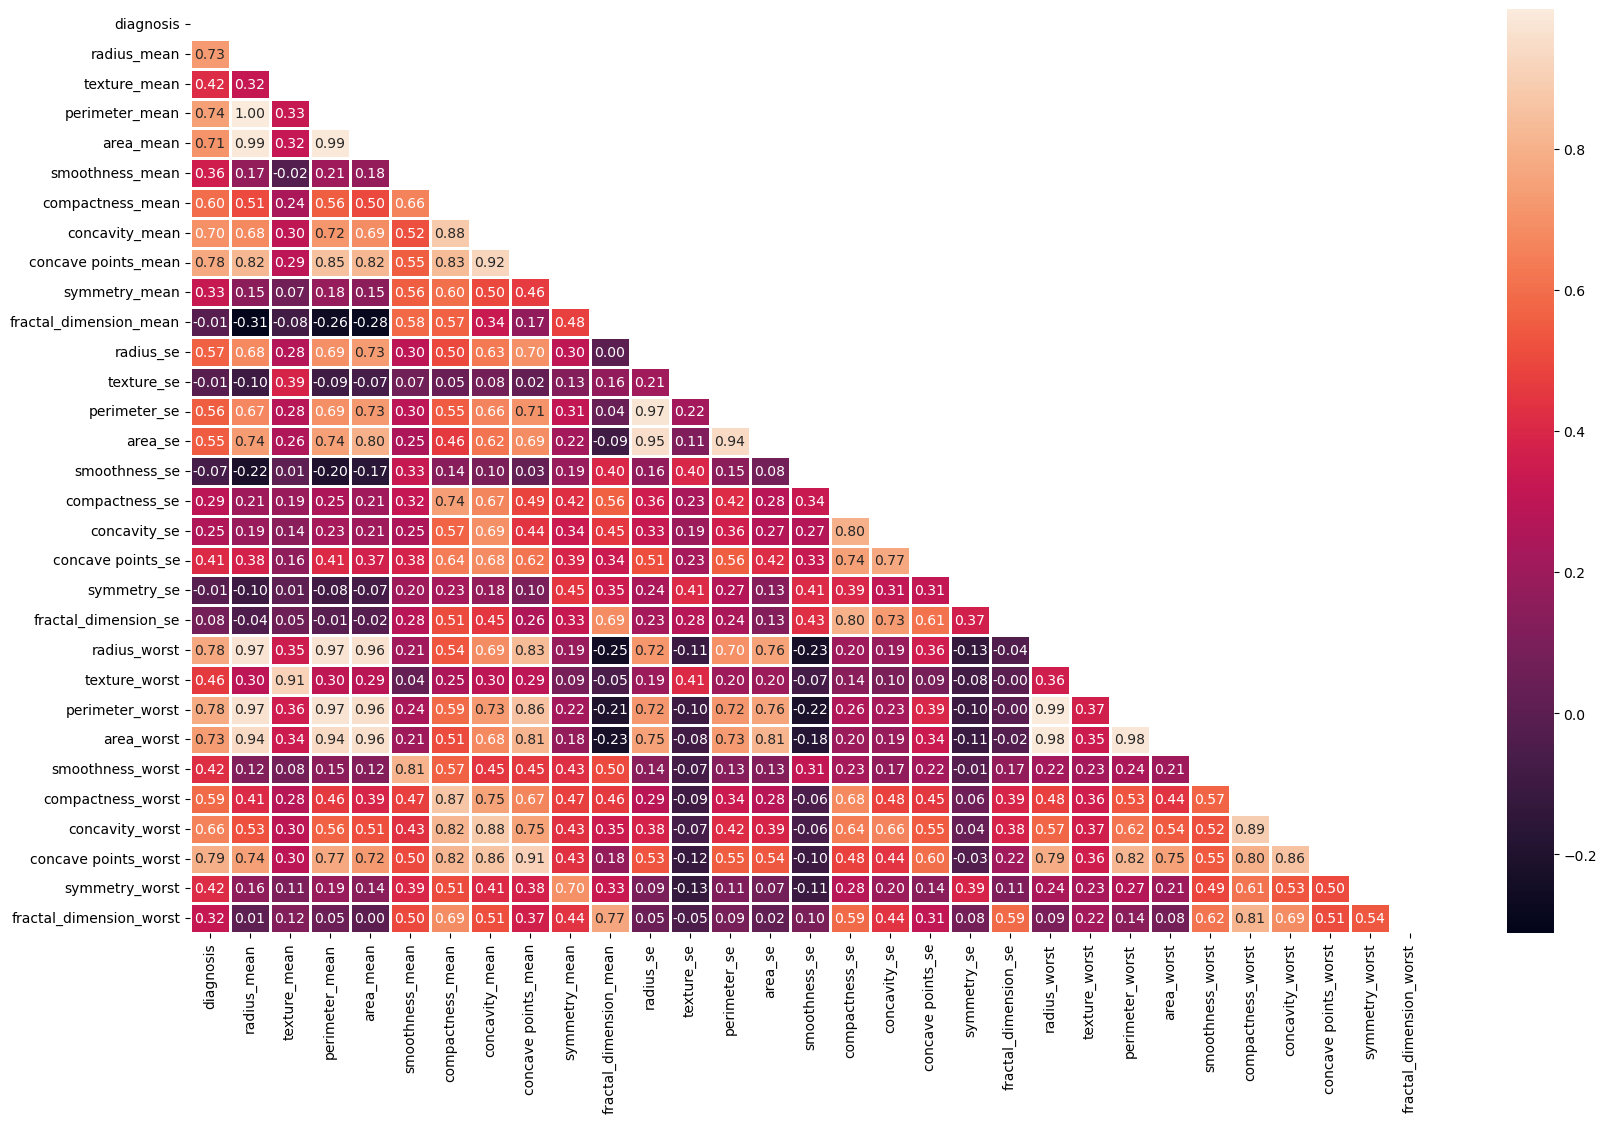

In [23]:
# heatmap
plt.figure(figsize=(20,12))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f")
plt.show()

In [24]:
# feature selection
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop, axis=1)

print(df.shape[1])

23


In [25]:
df.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0          1         10.38          0.11840           0.27760   
1          1         17.77          0.08474           0.07864   
2          1         21.25          0.10960           0.15990   
3          1         20.38          0.14250           0.28390   
4          1         14.34          0.10030           0.13280   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2597                 0.09744      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   area_se  smoothness_se  ...  symmetry_se  fractal_dimension_se  \
0   153.40       0.006399  ...      0.03003              0.006193   
1    74.08       0.005225  ...      0.01389              0.003532   
2    94.03       0.006150  ...      0.02250              0.004571   
3    27.23       0.009110  ...      0.05963              0.009208   
4    94.44       0.011490  ...      0.01756              0.005115   

   texture_worst  area_worst  smoothness_worst  compactness_worst  \
0          17.33      2019.0            0.1622             0.6656   
1          23.41      1956.0            0.1238             0.1866   
2          25.53      1709.0            0.1444             0.4245   
3          26.50       567.7            0.2098             0.8663   
4          16.67      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 23 columns]

Buliding Model

In [26]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 22)
Shape of test set: (114, 22)


In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [28]:
X_train.shape

(455, 22)

Models

LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = log_reg.predict(X_test)

In [31]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
y_pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9868131868131869
0.9736842105263158
[[71  0]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [34]:
y_pred = knn.predict(X_test)

In [35]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9714285714285714
0.9298245614035088
[[69  2]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        71
           1       0.95      0.86      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



SVC

In [37]:
#Hyperparameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc= SVC(probability=True)

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [38]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [39]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01, probability=True)

In [40]:
y_pred = svc.predict(X_test)

In [41]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.989010989010989
0.9824561403508771
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



DT

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [44]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'random'}

In [45]:
grid_search_dt.best_score_

0.9626373626373628

In [46]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter = 'random')

In [47]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9582417582417583
0.9649122807017544
[[68  3]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [50]:
y_pred = rand_clf.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9978021978021978
0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



GradientBoostingClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Updated parameters (use 'log_loss' instead of 'deviance')
parameters = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

# Perform Grid Search with cross-validation
grid_search_gbc = GridSearchCV(gbc, parameters, cv=2, n_jobs=-1, verbose=1)

# Fit the model
grid_search_gbc.fit(X_train, y_train)


Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [53]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 180}

In [54]:
grid_search_gbc.best_score_

0.9582270654610093

In [55]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9649122807017544
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



XGBClassifier

In [57]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9912087912087912
0.9473684210526315
[[70  1]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [59]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(rand_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
2                           SVM  98.25
0           Logistic Regression  97.37
3      Decision Tree Classifier  96.49
4      Random Forest Classifier  96.49
5  Gradient Boosting Classifier  96.49
6                       XgBoost  94.74
1                           KNN  92.98

Model Comparison

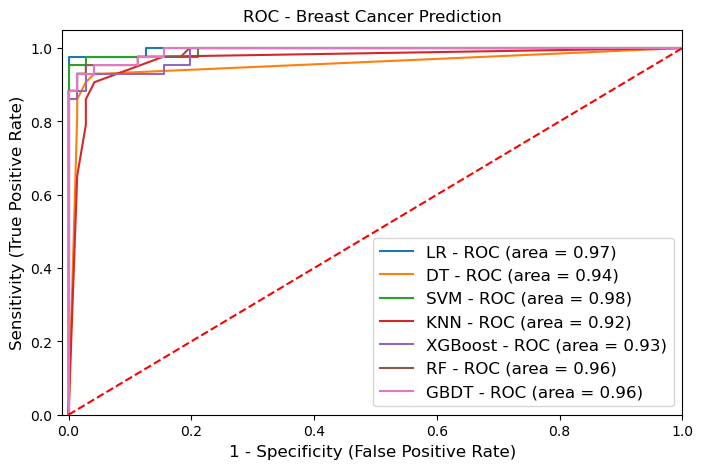

In [60]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

Making predictions with the best model

Building Best Model with Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [62]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

Probability of Predictions

In [63]:
print('Benign Predictions:')
logreg.predict_proba(X_test)[:,0]

Benign Predictions:


array([9.28151552e-01, 4.56990192e-05, 1.06447421e-02, 9.99686624e-01,
       9.99890524e-01, 1.51206672e-08, 4.86931678e-08, 1.75961396e-01,
       7.86482455e-01, 9.98635191e-01, 9.50318906e-01, 2.42227060e-02,
       9.91885225e-01, 6.26338827e-01, 9.94787571e-01, 1.50755226e-02,
       9.96849379e-01, 9.99933744e-01, 9.99997692e-01, 1.06022332e-05,
       9.49905770e-01, 9.84845401e-01, 9.02632366e-08, 9.99797603e-01,
       9.97387369e-01, 9.99482345e-01, 9.97371080e-01, 9.84173455e-01,
       9.95907384e-01, 7.59613917e-05, 9.99287239e-01, 9.99629957e-01,
       9.98468263e-01, 9.93796388e-01, 9.99707966e-01, 9.95114998e-01,
       1.57052015e-01, 9.94610969e-01, 5.44292051e-04, 9.65111598e-01,
       9.99863738e-01, 4.63678442e-03, 9.93965187e-01, 9.98493388e-01,
       9.34526942e-01, 9.58138988e-01, 9.99456902e-01, 9.99461866e-01,
       9.71063633e-01, 9.99154402e-01, 5.48047862e-04, 7.24214697e-07,
       8.05280643e-01, 9.84368417e-01, 9.99992334e-01, 9.85110149e-01,
      

In [64]:
print('Malignant Predictions:')
logreg.predict_proba(X_test)[:,1]

Malignant Predictions:


array([7.18484481e-02, 9.99954301e-01, 9.89355258e-01, 3.13375942e-04,
       1.09476184e-04, 9.99999985e-01, 9.99999951e-01, 8.24038604e-01,
       2.13517545e-01, 1.36480861e-03, 4.96810936e-02, 9.75777294e-01,
       8.11477500e-03, 3.73661173e-01, 5.21242888e-03, 9.84924477e-01,
       3.15062114e-03, 6.62555853e-05, 2.30784911e-06, 9.99989398e-01,
       5.00942304e-02, 1.51545986e-02, 9.99999910e-01, 2.02397202e-04,
       2.61263097e-03, 5.17655408e-04, 2.62892021e-03, 1.58265446e-02,
       4.09261560e-03, 9.99924039e-01, 7.12761272e-04, 3.70043069e-04,
       1.53173729e-03, 6.20361220e-03, 2.92034109e-04, 4.88500203e-03,
       8.42947985e-01, 5.38903097e-03, 9.99455708e-01, 3.48884021e-02,
       1.36262042e-04, 9.95363216e-01, 6.03481276e-03, 1.50661207e-03,
       6.54730585e-02, 4.18610119e-02, 5.43097895e-04, 5.38133612e-04,
       2.89363668e-02, 8.45598076e-04, 9.99451952e-01, 9.99999276e-01,
       1.94719357e-01, 1.56315832e-02, 7.66581903e-06, 1.48898509e-02,
      

Model Accuracy

In [65]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9737


In [66]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [67]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9890


Overfitting/Underfitting

In [68]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9890
Test set score: 0.9737


In [69]:
# incorporate the model
logreg100 = LogisticRegression(C=10, solver='liblinear', random_state=42)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [70]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9912
Test set score: 0.9737


In [71]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [72]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9956
Test set score: 0.9298


In [73]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [74]:
import pickle

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg001, file)

print("Model saved as: logistic_regression_model.pkl")

# with open('logistic_regression_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

Model saved as: logistic_regression_model.pkl


In [75]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.9560
Test set score: 0.9649


Null Accuracy

In [76]:
# check class distribution in test set

print('The number of positives are', np.count_nonzero(y_test == 1))
print('The number of negatives are', np.count_nonzero(y_test == 0))

The number of positives are 43
The number of negatives are 71


In [77]:
# check null accuracy score

null_accuracy = (89/(54+89))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6224


Confusion Matrix

In [78]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nFalse Negatives(FN) = ', cm[0,1])

print('\nFalse Positives(FP)) = ', cm[1,0])


Confusion matrix

 [[71  0]
 [ 3 40]]

True Negatives(TN) =  71

True Positives(TP) =  40

False Negatives(FN) =  0

False Positives(FP)) =  3


Classification Report

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Classification Accuracy and Error Metrics Explained

In [80]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

In [81]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9737


In [82]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0263


Precision

In [83]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9302


In [84]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [85]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0405


Investigating Predicted Probabilities

In [86]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.28151552e-01, 7.18484481e-02],
       [4.56990192e-05, 9.99954301e-01],
       [1.06447421e-02, 9.89355258e-01],
       [9.99686624e-01, 3.13375942e-04],
       [9.99890524e-01, 1.09476184e-04],
       [1.51206672e-08, 9.99999985e-01],
       [4.86931678e-08, 9.99999951e-01],
       [1.75961396e-01, 8.24038604e-01],
       [7.86482455e-01, 2.13517545e-01],
       [9.98635191e-01, 1.36480861e-03]])

In [87]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of Benign Tumor (0)', 'Prob of Malignant Tumor (1)'])

y_pred_prob_df

Prob of Benign Tumor (0)  Prob of Malignant Tumor (1)
0              9.281516e-01                     0.071848
1              4.569902e-05                     0.999954
2              1.064474e-02                     0.989355
3              9.996866e-01                     0.000313
4              9.998905e-01                     0.000109
5              1.512067e-08                     1.000000
6              4.869317e-08                     1.000000
7              1.759614e-01                     0.824039
8              7.864825e-01                     0.213518
9              9.986352e-01                     0.001365

In [88]:
# print the first 10 predicted probabilities for class 1 - Probability of Malignant Tumor

logreg.predict_proba(X_test)[0:10, 1]

array([7.18484481e-02, 9.99954301e-01, 9.89355258e-01, 3.13375942e-04,
       1.09476184e-04, 9.99999985e-01, 9.99999951e-01, 8.24038604e-01,
       2.13517545e-01, 1.36480861e-03])

In [89]:
# store the predicted probabilities for class 1 - Probability of Malignant Tumour

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Cross Validation

In [90]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.97802198 0.96703297 0.98901099 0.97802198 0.94505495]


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define and train the model
logreg = LogisticRegression(max_iter=1000)
cross_val_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-validation scores:', cross_val_scores)

# Hyperparameter tuning using GridSearchCV
parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
}
grid_search = GridSearchCV(logreg, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_


Cross-validation scores: [0.97802198 0.96703297 0.98901099 0.97802198 0.94505495]


In [92]:
def predict(model, features):
    prediction = model.predict([features])
    return prediction[0]


In [93]:
X_train = np.random.rand(100, 30)
y_train = np.random.randint(2, size=100)

# Initialize SVC Model with GridSearchCV
svc = SVC(probability=True)
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

# Cross-Validation Scores
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('Cross-validation scores:', scores)


Cross-validation scores: [0.45 0.55 0.65 0.55 0.7 ]


In [94]:
# Function to calculate mean, se, and worst
def classify_features(inputs):
    classified_inputs = {}
    for key, value in inputs.items():
        classified_inputs[f'{key}_mean'] = value
        classified_inputs[f'{key}_se'] = value * 0.1  # Simulated logic for SE
        classified_inputs[f'{key}_worst'] = value * 1.5  # Simulated logic for worst
    return classified_inputs

# User inputs
import ipywidgets as widgets
from IPython.display import display

# Create text boxes for each input feature
radius_input = widgets.FloatText(
    value=0.0,
    description='Radius:',
    disabled=False
)

texture_input = widgets.FloatText(
    value=0.0,
    description='Texture:',
    disabled=False
)

perimeter_input = widgets.FloatText(
    value=0.0,
    description='Perimeter:',
    disabled=False
)

area_input = widgets.FloatText(
    value=0.0,
    description='Area:',
    disabled=False
)

smoothness_input = widgets.FloatText(
    value=0.0,
    description='Smoothness:',
    disabled=False
)

compactness_input = widgets.FloatText(
    value=0.0,
    description='Compactness:',
    disabled=False
)

concavity_input = widgets.FloatText(
    value=0.0,
    description='Concavity:',
    disabled=False
)

concave_points_input = widgets.FloatText(
    value=0.0,
    description='Concave Points:',
    disabled=False
)

symmetry_input = widgets.FloatText(
    value=0.0,
    description='Symmetry:',
    disabled=False
)

fractal_dimension_input = widgets.FloatText(
    value=0.0,
    description='Fractal Dimension:',
    disabled=False
)

# Display all the inputs
display(radius_input, texture_input, perimeter_input, area_input, 
        smoothness_input, compactness_input, concavity_input, 
        concave_points_input, symmetry_input, fractal_dimension_input)

# Function to collect user input from the widgets and classify them
def collect_user_inputs():
    user_inputs = {
        'radius': radius_input.value,
        'texture': texture_input.value,
        'perimeter': perimeter_input.value,
        'area': area_input.value,
        'smoothness': smoothness_input.value,
        'compactness': compactness_input.value,
        'concavity': concavity_input.value,
        'concave points': concave_points_input.value,
        'symmetry': symmetry_input.value,
        'fractal_dimension': fractal_dimension_input.value
    }
    return user_inputs

# Run the function to collect inputs
user_inputs = collect_user_inputs()
print(user_inputs)

# Classify inputs internally
classified_inputs = classify_features(user_inputs)

# Ensure the order of features matches what the model expects
feature_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

features = [classified_inputs[feature] for feature in feature_columns]

# SVC Model with GridSearchCV
svc = SVC(probability=True)
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

# Define the prediction function
def predict(model, features):
    prediction = model.predict([features])
    return prediction[0]

# Saving the model
def load_model():
  with open('logreg001_model.pkl', 'rb') as file:
      model = pickle.load(file)
  return model

# Make a prediction
prediction = predict(model, features)
if prediction == 1:
    print("Predicted: Malign - Cancerous")
else:
    print("Predicted: Benign - Non Cancerous")

# Health recommendations based on prediction
if prediction == 1:
    print("Here are some additional recommendations for your patients:")
    print("- **Give them the facts about their cancer diagnosis:** Inform the exact type of cancer they have and how advanced it is. Where the cancer is located and whether it is considered rare or common, fast- or slow-growing. The answers to these questions will help them make informed decisions about the treatment.")
    print("- **Explore their treatment options:** Let them know which ones might work best for them. Explain the side effects they can expect from each treatment option and how they could affect their lifestyle.")
    print("- **Looking after quality of life:** Successful care requires close collaboration and open communication about your patient concerns and what they are feeling. Talk about pain. Let them know that certain sorts of pain may be warning signs of serious problems that may need urgent attention like:Back pain which suddenly becomes much worse. Pain in the hips or legs which becomes very severe when standing or walking. Persistent headaches. Severe stomach pain and diarrhea after chemotherapy. Severe pain from mouth ulcers that makes it difficult to eat or drink.")
else:
    print("Here are some health tips for general wellness:")
    print("- **Smoking & Tobacco:** Tobacco use is accountable for at least 30% of all cancer deaths, and smoking causes nearly 90% of all lung cancers. People who live with smokers are more likely to develop lung cancer and even limited exposure to secondhand smoke can raise your heart disease risk.")
    print("- **Stay Active:** Our body runs on food. Foods affect how we feel, how it operates and the risk for diseases like cancer.Reduce intake of red and processed meats by choosing fish, seafood or poultry.Increase the amount of fruits and vegetables you eat.Consuming alcohol in any quantity has been shown to increase the risk of cancers.Choose whole grains or other whole food carbohydrates rather than processed carbohydrates.")    
    print("- **Regular Check-ups:** Preventive healthcare is important, be an active advocate of regular screening test. If your patient is taking, or have been told to take, hormone replacement therapy or oral contraceptives (birth control pills),explain them the risks.Here are some of the most important recommendations you can give to your patients: Maintaining a healthy body weight and tell them how it lowers the risk for more than 10 types of cancer.Being physically can help maintain a healthy weight.The best way to protect from skin cancer is to limit the exposure to UV rays from the sun and tanning beds.The HPV vaccine is the best protection against HPV and related cancers. All boys and girls between the ages of 11 and 12 should complete the HPV vaccine series.Hepatitis B and C can cause long-term illness that leads to liver damage and liver cancer. Hepatitis C also can cause non-Hodgkin lymphoma.")

FloatText(value=0.0, description='Radius:')

FloatText(value=0.0, description='Texture:')

FloatText(value=0.0, description='Perimeter:')

FloatText(value=0.0, description='Area:')

FloatText(value=0.0, description='Smoothness:')

FloatText(value=0.0, description='Compactness:')

FloatText(value=0.0, description='Concavity:')

FloatText(value=0.0, description='Concave Points:')

FloatText(value=0.0, description='Symmetry:')

FloatText(value=0.0, description='Fractal Dimension:')

{'radius': 0.0, 'texture': 0.0, 'perimeter': 0.0, 'area': 0.0, 'smoothness': 0.0, 'compactness': 0.0, 'concavity': 0.0, 'concave points': 0.0, 'symmetry': 0.0, 'fractal_dimension': 0.0}
Predicted: Benign - Non Cancerous
Here are some health tips for general wellness:
- **Smoking & Tobacco:** Tobacco use is accountable for at least 30% of all cancer deaths, and smoking causes nearly 90% of all lung cancers. People who live with smokers are more likely to develop lung cancer and even limited exposure to secondhand smoke can raise your heart disease risk.
- **Stay Active:** Our body runs on food. Foods affect how we feel, how it operates and the risk for diseases like cancer.Reduce intake of red and processed meats by choosing fish, seafood or poultry.Increase the amount of fruits and vegetables you eat.Consuming alcohol in any quantity has been shown to increase the risk of cancers.Choose whole grains or other whole food carbohydrates rather than processed carbohydrates.
- **Regular Chec